# Análisis Estratégico de Precios Mayoristas para el Sector Retail de Frutas y Hortalizas

**Autor: Ricardo Urdaneta**

Fecha: 24 julio 2025


---


**FRESCORP S.A.** es una cadena de supermercados `FICTICIA`, con fuerte presencia en la venta de abarrotes, carnes y productos envasados. Recientemente, han notado un creciente interés de sus clientes por productos frescos, saludables y de origen local.

Para capitalizar esta tendencia y competir con las grandes cadenas y ferias locales, la gerencia ha decidido lanzar una nueva línea de negocio: **"FRESCORP Verde"**, dedicada exclusivamente a la venta de frutas y hortalizas de alta calidad.

>La empresa no tiene experiencia en la compra a gran escala de productos perecederos. El mercado de frutas y hortalizas es volátil y los precios cambian constantemente. Antes de invertir en logística, refrigeración y personal, necesitan un **plan de negocio basado en datos** para asegurar la rentabilidad del proyecto y ofrecer precios competitivos a sus clientes.

---

### Objetivos del Análisis:

Este análisis tiene como objetivo proporcionar una estrategia inicial para el lanzamiento de "FRESCORP Verde", respondiendo a preguntas críticas de negocio en tres áreas fundamentales.

---

### Preguntas Clave:

#### Selección de Cartera de Productos
* ¿Qué productos tienen los precios de compra más estables a lo largo del año?
* ¿Qué productos tienen el menor costo de adquisición promedio?
* ¿Existen "canastas básicas" de productos (ej. tomate, cebolla, papa) cuyos precios combinados sean predecibles?

#### Estrategia de Precios y Promociones
* ¿Cuáles son los meses de "temporada baja" (precios más baratos) para productos populares como paltas, frutillas o uvas?
* ¿Qué productos sufren las mayores alzas de precio?
* ¿Podemos identificar productos "gancho" (baratos todo el año) y productos "premium" (volátiles pero con buen margen en temporada)?

#### Optimización de la Cadena de Suministro
* ¿Hay días específicos de la semana o quincenas del mes en los que los precios mayoristas tienden a ser más bajos?
* ¿Cómo fluctúa el precio de productos clave que se pueden almacenar por más tiempo (ej. papa, zapallo)?
---

#### Preparamos el ambiente

Importamos las librerias que usaremos para el analisis

In [ ]:
# Librerías para Manipulación y Análisis de Datos ---
import pandas as pd  # Para manipulación de datos en estructuras tabulares
import numpy as np   # Para operaciones numéricas avanzadas
import datetime as dt  # Para manejar fechas y tiempos

# Librerías para Visualización de Datos ---
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import seaborn as sns            # Para visualizaciones estadísticas más atractivas

# Asegura que los gráficos se muestren directamente en el notebook
%matplotlib inline

In [8]:
# Define la ruta del archivo CSV
file_path = 'data/lista_mayorista.csv'

# Carga el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

#### Exploración de datos inicial
Exploramos la base de datos usando las funciones `df.head()` y `df.tail()`

In [11]:
# Muestra las primeras 5 filas del DataFrame
df.head()

,Fecha,ID region,Region,Mercado,Subsector,Producto,Variedad / Tipo,Calidad,Unidad de comercializacion,Origen,Volumen,Precio minimo,Precio maximo,Precio promedio ponderado
0,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,$/docena de atados (6 kilos),Provincia de Quillota,110,"4000,0000","4000,0000","4000,0000"
1,2025-01-02,8,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región Metropolitana,300,"800,0000","800,0000","800,0000"
2,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región de Ñuble,200,"600,0000","600,0000","600,0000"
3,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Segunda,"$/atado 0,5 a 1 kilo",Región de Ñuble,600,"500,0000","500,0000","500,0000"
4,2025-01-02,4,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 15 kilos,Provincia de Limarí,400,"15000,0000","17000,0000","16000,0000"


In [12]:
# Muestra las últimas 5 filas del DataFrame
df.tail()

,Fecha,ID region,Region,Mercado,Subsector,Producto,Variedad / Tipo,Calidad,Unidad de comercializacion,Origen,Volumen,Precio minimo,Precio maximo,Precio promedio ponderado
113506,2025-07-18,13,Región Metropolitana de Santiago,Vega Central Mapocho de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Primera,$/paquete 36 unidades,Región Metropolitana,520,"5000,0000","5200,0000","5100,0000"
113507,2025-07-18,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Primera,$/paquete 36 unidades,Región Metropolitana,900,"5000,0000","5000,0000","5000,0000"
113508,2025-07-18,13,Región Metropolitana de Santiago,Vega Central Mapocho de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Segunda,$/paquete 36 unidades,Región Metropolitana,340,"4000,0000","4500,0000","4250,0000"
113509,2025-07-18,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Segunda,$/paquete 36 unidades,Región Metropolitana,600,"4500,0000","4500,0000","4500,0000"
113510,2025-07-18,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Cebollín,Sin especificar,Tercera,$/paquete 36 unidades,Región Metropolitana,500,"3800,0000","3800,0000","3800,0000"


> Podemos identificar fácilmente que tenemos una mezcla de variables **categóricas, numéricas y temporales**.

Cada fila en nuestra base de datos representa un **registro de precio** en un momento específico. Es decir, nos muestra el **precio mayorista** para un **producto determinado** en una **fecha específica**.

Las columnas nos dan los detalles de este registro, incluyendo:

* **Variables Categóricas:** como `Producto` (ej: 'Tomate', 'Manzana Fuji') y `Categoría` (ej: 'Hortaliza', 'Fruta').
* **Variables Numéricas:** como el `Precio`.
* **Variable Temporal:** que es la `Fecha` del registro.

Esta estructura es ideal para analizar tendencias de precios, estacionalidad y volatilidad, que son los objetivos centrales del proyecto.

Ahora usamos las funciones `df.shape` y `df.info()` para obtener mas información de nuestra base de datos:

In [18]:
# Muestra la forma del DataFrame (número de filas y columnas)
df.shape

(113511, 14)

In [19]:
# Muestra información detallada del DataFrame, incluyendo tipos de datos y memoria utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113511 entries, 0 to 113510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Fecha                       113511 non-null  object
 1   ID region                   113511 non-null  int64 
 2   Region                      113511 non-null  object
 3   Mercado                     113511 non-null  object
 4   Subsector                   113511 non-null  object
 5   Producto                    113511 non-null  object
 6   Variedad / Tipo             113511 non-null  object
 7   Calidad                     113511 non-null  object
 8   Unidad de comercializacion  113511 non-null  object
 9   Origen                      113511 non-null  object
 10  Volumen                     113511 non-null  int64 
 11  Precio minimo               113511 non-null  object
 12  Precio maximo               113511 non-null  object
 13  Precio promedio ponderado   1

Con estas funciones obtenemos la primera radiografía de nuestra base de datos y nos revela:
1. La magnitud de la base de datos con 113511 registros en 14 columnas.
2. Los tipos de datos de las columnas y que debemos realizar ciertas conversiones para poder trabajar adecuadamente

#### EXPLICAR LAS CONVERSIONES QUE HAY QUE HACER:
datetime
las columnas de precios hubo que usar una funcion bucle para reemplazar la coma decimal por un punto para luego convertirlo a float


In [21]:
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [24]:
# Lista de las columnas de precios que convertiremos
columnas_precio = ['Precio minimo', 'Precio maximo', 'Precio promedio ponderado']

# Bucle para limpiar y convertir cada columna
for col in columnas_precio:
  # 1. Reemplaza la coma decimal por un punto
  df[col] = df[col].str.replace(',', '.', regex=False)
  # 2. Convierte la columna a tipo numérico (float)
  df[col] = pd.to_numeric(df[col])

# Verificamos que los tipos de datos han cambiado a float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113511 entries, 0 to 113510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       113511 non-null  datetime64[ns]
 1   ID region                   113511 non-null  int64         
 2   Region                      113511 non-null  object        
 3   Mercado                     113511 non-null  object        
 4   Subsector                   113511 non-null  object        
 5   Producto                    113511 non-null  object        
 6   Variedad / Tipo             113511 non-null  object        
 7   Calidad                     113511 non-null  object        
 8   Unidad de comercializacion  113511 non-null  object        
 9   Origen                      113511 non-null  object        
 10  Volumen                     113511 non-null  int64         
 11  Precio minimo               113511 non-

## Limpieza de datos:

Podemos apreciar rápidamente que no hay valores nulos, sin embargo y por buena práctica, lo confirmamos con la función `df.isnull().sum()`

In [ ]:
# Verificamos si hay valores nulos en el DataFrame
df.isnull().sum()

Fecha                         0
ID region                     0
Region                        0
Mercado                       0
Subsector                     0
Producto                      0
Variedad / Tipo               0
Calidad                       0
Unidad de comercializacion    0
Origen                        0
Volumen                       0
Precio minimo                 0
Precio maximo                 0
Precio promedio ponderado     0
dtype: int64

Así mismo también verificaremos los duplicados con la función `df.duplicated().sum()`

In [30]:
# Verificamos si hay duplicados en el DataFrame
df.duplicated().sum()

np.int64(0)

# Renombramos las columnas

In [35]:
# Renombramos, incluyendo un paso final para corregir dobles guiones bajos
df.columns = [col.lower().replace(' ', '_').replace('/', '_').replace('__', '_') for col in df.columns]

# Muestra los nombres corregidos para verificar
print(df.columns)

Index(['fecha', 'id_region', 'region', 'mercado', 'subsector', 'producto',
       'variedad_tipo', 'calidad', 'unidad_de_comercializacion', 'origen',
       'volumen', 'precio_minimo', 'precio_maximo',
       'precio_promedio_ponderado'],
      dtype='object')


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113511 entries, 0 to 113510
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   fecha                       113511 non-null  datetime64[ns]
 1   id_region                   113511 non-null  int64         
 2   region                      113511 non-null  object        
 3   mercado                     113511 non-null  object        
 4   subsector                   113511 non-null  object        
 5   producto                    113511 non-null  object        
 6   variedad_tipo               113511 non-null  object        
 7   calidad                     113511 non-null  object        
 8   unidad_de_comercializacion  113511 non-null  object        
 9   origen                      113511 non-null  object        
 10  volumen                     113511 non-null  int64         
 11  precio_minimo               113511 non-

---
# Trabajaremos en la estandarización de la columna unidad_de_comercializacion, explicar lo complicada que es

Paso 1: Extraer el Peso en KG (Casos Explícitos)
Primero, nos ocuparemos de los casos más sencillos, donde el peso en kilogramos está claramente indicado en la descripción.

Usaremos una expresión regular para buscar un número dentro de un paréntesis que esté asociado a "kg" o "kilo".

In [40]:
# Regex mejorado: busca un número seguido de un espacio y las palabras 'kilo', 'kilos' o 'kg'
regex_mejorado = r'(\d+)\s*(?:kilos|kilo|kg)'

# Paso 1: Extraer el peso usando el nuevo regex.
# Esto reemplazará la columna 'peso_kg' anterior con una mucho más completa.
df['peso_kg'] = df['unidad_de_comercializacion'].str.extract(regex_mejorado, expand=False)
df['peso_kg'] = pd.to_numeric(df['peso_kg'])

Paso 2: Calcular el Precio por Kilo
Con los pesos que acabamos de extraer, ya podemos calcular nuestra métrica estandarizada para una gran parte del dataset.

In [44]:
# Paso 2: (Re)calcular el precio por kilo con los nuevos datos
df['precio_por_kg'] = df['precio_promedio_ponderado'] / df['peso_kg']

# --- Verificación ---
print(f"Total de pesos extraídos con el código mejorado: {df['peso_kg'].notna().sum()}")

# Mostramos algunas filas para confirmar que funcionó correctamente
display(df[df['unidad_de_comercializacion'].str.contains('caja 10 kilos', na=False)].head())

Total de pesos extraídos con el código mejorado: 78873


,fecha,id_region,region,mercado,subsector,producto,variedad_tipo,calidad,unidad_de_comercializacion,origen,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades
12,2025-01-02,9,Región de La Araucanía,Vega Modelo de Temuco,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 10 kilos,Región de Arica y Parinacota,125,25000.0,25000.0,25000.0000,10.0,2500.00000,NaN
13,2025-01-02,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,1200,20000.0,20000.0,20000.0000,10.0,2000.00000,NaN
14,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,80,23000.0,23000.0,23000.0000,10.0,2300.00000,NaN
15,2025-01-02,8,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,350,23000.0,24000.0,23428.5714,10.0,2342.85714,NaN
16,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Ajo,Chino,Primera,$/caja 10 kilos,China,40,20000.0,20000.0,20000.0000,10.0,2000.00000,NaN


## Estandarizar los productos que se venden por unidad.

El objetivo será crear dos nuevas columnas:

numero_unidades: Para guardar la cantidad de unidades (ej: 5, 36, etc.).

precio_por_unidad: Para calcular el precio de una sola unidad.

Paso 1: Extraer la Cantidad de Unidades
Primero, usaremos una expresión regular para extraer el número que aparece antes de la palabra "unidades".

In [43]:
# Regex: busca un número seguido de un espacio y la palabra 'unidades' o 'unidad'
regex_unidades = r'(\d+)\s*unidades?'

# Extraemos el número y lo guardamos en una nueva columna
df['numero_unidades'] = df['unidad_de_comercializacion'].str.extract(regex_unidades, expand=False)

# Convertimos a tipo numérico
df['numero_unidades'] = pd.to_numeric(df['numero_unidades'])

print("Valores de unidades extraídos:")
display(df[df['numero_unidades'].notna()][['unidad_de_comercializacion', 'numero_unidades']].head())

Valores de unidades extraídos:


,unidad_de_comercializacion,numero_unidades
60,$/caja 50 unidades,50.0
61,$/caja 60 unidades,60.0
62,$/caja 40 unidades,40.0
63,$/caja 40 unidades,40.0
64,$/caja 40 unidades,40.0


Paso 2: Manejar Casos de "Unidad" Singular
Algunas descripciones podrían decir simplemente "unidad", lo que implica que es solo una. El código anterior no captura esto porque no hay un número explícito. Vamos a corregir esos casos y asignarles el valor 1.

In [45]:
# Buscamos filas que contienen 'unidad' pero donde no pudimos extraer un número
# y les asignamos el valor 1
condicion = df['unidad_de_comercializacion'].str.contains('unidad', na=False) & df['numero_unidades'].isnull()
df.loc[condicion, 'numero_unidades'] = 1

print("\nCasos de 'unidad' singular corregidos:")
display(df[condicion][['unidad_de_comercializacion', 'numero_unidades']].head())


Casos de 'unidad' singular corregidos:


,unidad_de_comercializacion,numero_unidades
70,$/unidad,1.0
77,$/unidad,1.0
78,$/unidad,1.0
79,$/unidad,1.0
80,$/unidad,1.0


Paso 3: Calcular el Precio por Unidad
Ahora que tenemos la cantidad de unidades, podemos calcular el precio estandarizado por unidad.

In [48]:
# Calculamos el precio por unidad
df['precio_por_unidad'] = df['precio_promedio_ponderado'] / df['numero_unidades']

# Mostramos un resumen final
print("\nResumen con la nueva columna 'precio_por_unidad':")
display(df[df['precio_por_unidad'].notna()][['producto', 'unidad_de_comercializacion', 'numero_unidades', 'precio_por_unidad']].head())


Resumen con la nueva columna 'precio_por_unidad':


,producto,unidad_de_comercializacion,numero_unidades,precio_por_unidad
60,Berenjena,$/caja 50 unidades,50.0,130.000000
61,Berenjena,$/caja 60 unidades,60.0,72.222222
62,Berenjena,$/caja 40 unidades,40.0,212.500000
63,Berenjena,$/caja 40 unidades,40.0,225.000000
64,Berenjena,$/caja 40 unidades,40.0,212.500000


Con esto, hemos estandarizado exitosamente los productos que se venden por unidad. Ahora tenemos  dos métricas muy poderosas para tu análisis: `precio_por_kg` y `precio_por_unidad`.

In [53]:
df.head(10)

,fecha,id_region,region,mercado,subsector,producto,variedad_tipo,calidad,unidad_de_comercializacion,origen,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades,precio_por_unidad
0,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,$/docena de atados (6 kilos),Provincia de Quillota,110,4000.0,4000.0,4000.0000,6.0,666.666667,NaN,NaN
1,2025-01-02,8,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región Metropolitana,300,800.0,800.0,800.0000,1.0,800.000000,NaN,NaN
2,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,"$/atado 0,5 a 1 kilo",Región de Ñuble,200,600.0,600.0,600.0000,1.0,600.000000,NaN,NaN
3,2025-01-02,16,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Segunda,"$/atado 0,5 a 1 kilo",Región de Ñuble,600,500.0,500.0,500.0000,1.0,500.000000,NaN,NaN
4,2025-01-02,4,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 15 kilos,Provincia de Limarí,400,15000.0,17000.0,16000.0000,15.0,1066.666667,NaN,NaN
5,2025-01-02,4,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Segunda,$/caja 15 kilos,Provincia de Limarí,240,12000.0,13000.0,12500.0000,15.0,833.333333,NaN,NaN
6,2025-01-02,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Ají,Americana (o),Primera,$/caja 25 kilos,Provincia de Limarí,60,28000.0,28000.0,28000.0000,25.0,1120.000000,NaN,NaN
7,2025-01-02,9,Región de La Araucanía,Vega Modelo de Temuco,Hortalizas y tubérculos,Ají,Americana (o),Primera,$/caja 25 kilos,Provincia de Limarí,55,35000.0,35000.0,35000.0000,25.0,1400.000000,NaN,NaN
8,2025-01-02,13,Región Metropolitana de Santiago,Mercado Mayorista Lo Valledor de Santiago,Hortalizas y tubérculos,Ají,Americana (o),Segunda,$/caja 25 kilos,Provincia de Limarí,40,25000.0,25000.0,25000.0000,25.0,1000.000000,NaN,NaN
9,2025-01-02,5,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Ají,Inferno,Primera,$/caja 15 kilos,Limache,45,29000.0,30000.0,29555.5555,15.0,1970.370367,NaN,NaN


## Para saber cuántas filas no tienen valor ni en peso_kg ni en numero_unidades, usamos una condición que filtre los casos en los que ambas columnas son nulas.

Código para Contar las Filas sin Asignación
Este código te dará el número total de filas que no pudimos clasificar ni por kilo ni por unidad.

In [60]:
# Condición: busca filas donde 'peso_kg' es nulo Y 'numero_unidades' también es nulo
filas_sin_asignar = df[df['peso_kg'].isnull() & df['numero_unidades'].isnull()]

# Contamos cuántas filas cumplen esa condición
total_sin_asignar = len(filas_sin_asignar)

print(f"Número total de filas sin asignar: {total_sin_asignar}")

# Muestra las primeras 5 filas que no fueron asignadas
print("\nEjemplos de filas no asignadas:")
display(filas_sin_asignar[['unidad_de_comercializacion', 'producto']].head(10))

Número total de filas sin asignar: 5229

Ejemplos de filas no asignadas:


,unidad_de_comercializacion,producto
23,$/docena de matas,Albahaca
24,$/docena de matas,Albahaca
25,$/docena de matas,Albahaca
26,$/docena de matas,Albahaca
27,$/docena de matas,Apio
28,$/docena de matas,Apio
29,$/docena de matas,Apio
30,$/docena de matas,Apio
31,$/docena de matas,Apio
32,$/docena de matas,Apio


Descubrimos que "docena" es una palabra clave que podemos convertir a un número específico.

Usaremos un código para buscar la palabra "docena" y asignar el valor 12 a la columna numero_unidades en las filas correspondientes.

Código para Asignar "Docena" = 12
Aplicaremos la misma lógica que usamos para la "unidad" singular.

In [61]:
# Condición: busca filas que contienen 'docena' y donde 'numero_unidades' aún no ha sido asignado.
condicion_docena = df['unidad_de_comercializacion'].str.contains('docena', na=False) & df['numero_unidades'].isnull()

# Asignamos el valor 12 a esas filas
df.loc[condicion_docena, 'numero_unidades'] = 12

# --- Verificación ---
print("Filas con 'docena' actualizadas a 12 unidades:")
display(df[condicion_docena][['unidad_de_comercializacion', 'numero_unidades']])

Filas con 'docena' actualizadas a 12 unidades:


,unidad_de_comercializacion,numero_unidades
0,$/docena de atados (6 kilos),12.0
23,$/docena de matas,12.0
24,$/docena de matas,12.0
25,$/docena de matas,12.0
26,$/docena de matas,12.0
...,...,...
113281,$/docena de atados,12.0
113282,$/docena de atados,12.0
113286,$/docena de atados (2 kilos),12.0
113358,$/docena de paquetes,12.0


### Actualizar el Precio por Unidad
Ahora que hemos añadido más valores a numero_unidades, debemos volver a ejecutar el cálculo del precio_por_unidad para que estas nuevas filas también tengan su precio estandarizado.

In [62]:
# Recalculamos el precio por unidad para incluir los nuevos valores
df['precio_por_unidad'] = df['precio_promedio_ponderado'] / df['numero_unidades']

print("\nVerificación del precio por unidad para las docenas:")
display(df[condicion_docena][['unidad_de_comercializacion', 'precio_promedio_ponderado', 'numero_unidades', 'precio_por_unidad']])


Verificación del precio por unidad para las docenas:


,unidad_de_comercializacion,precio_promedio_ponderado,numero_unidades,precio_por_unidad
0,$/docena de atados (6 kilos),4000.0000,12.0,333.333333
23,$/docena de matas,2900.0000,12.0,241.666667
24,$/docena de matas,3500.0000,12.0,291.666667
25,$/docena de matas,3277.7777,12.0,273.148142
26,$/docena de matas,2500.0000,12.0,208.333333
...,...,...,...,...
113281,$/docena de atados,11000.0000,12.0,916.666667
113282,$/docena de atados,12000.0000,12.0,1000.000000
113286,$/docena de atados (2 kilos),6000.0000,12.0,500.000000
113358,$/docena de paquetes,9595.2380,12.0,799.603167


## Volvemos a revisar cuantos registros quedaron sin clasificar en las nuevas 2 columnas

In [67]:
# Condición: busca filas donde 'peso_kg' es nulo Y 'numero_unidades' también es nulo
filas_sin_asignar = df[df['peso_kg'].isnull() & df['numero_unidades'].isnull()]

# Contamos cuántas filas cumplen esa condición
total_sin_asignar = len(filas_sin_asignar)

print(f"Número total de filas sin asignar: {total_sin_asignar}")

Número total de filas sin asignar: 1254


## Decidimos no trabajar con ellas ya que representan una porción pequeña del total, eliminarlas simplifica el análisis sin afectar significativamente el resultado.

1. Eliminar las Filas no Clasificadas
Ahora, crearemos un nuevo DataFrame que contenga únicamente las filas que sí pudimos clasificar (es decir, que tienen un valor en peso_kg o en numero_unidades).

In [90]:
# Condición: Mantener filas donde 'peso_kg' NO es nulo O 'numero_unidades' NO es nulo
condicion_mantener = df['peso_kg'].notna() | df['numero_unidades'].notna()

# Creamos un nuevo DataFrame1
df1 = df[condicion_mantener].copy()

print(f"Tamaño original del DataFrame: {len(df)} filas")
print(f"Tamaño del nuevo DataFrame limpio: {len(df1)} filas")

Tamaño original del DataFrame: 113511 filas
Tamaño del nuevo DataFrame limpio: 112257 filas


2. Eliminar la Columna unidad_de_comercializacion
Ahora que extrajimos toda la información valiosa de esta columna y eliminamos las filas que no servían, ya no la necesitamos.

In [91]:
# Eliminamos la columna original del nuevo DataFrame
df1 = df1.drop(columns=['unidad_de_comercializacion'])

# Verificamos las columnas restantes
print("\nColumnas del DataFrame final:")
print(df1.columns)


Columnas del DataFrame final:
Index(['fecha', 'id_region', 'region', 'mercado', 'subsector', 'producto',
       'variedad_tipo', 'calidad', 'origen', 'volumen', 'precio_minimo',
       'precio_maximo', 'precio_promedio_ponderado', 'peso_kg',
       'precio_por_kg', 'numero_unidades', 'precio_por_unidad'],
      dtype='object')


## Por ultimo y no menos importante enrriqueceremos la Columna de Fecha para analizar tendencias estacionales

In [92]:
# Extrae el mes y el día de la semana
df1['mes'] = df1['fecha'].dt.month
df1['dia_semana'] = df1['fecha'].dt.day_name()

# Verificamos las nuevas columnas
display(df1[['fecha', 'mes', 'dia_semana']].head())

,fecha,mes,dia_semana
0,2025-01-02,1,Thursday
1,2025-01-02,1,Thursday
2,2025-01-02,1,Thursday
3,2025-01-02,1,Thursday
4,2025-01-02,1,Thursday


Y eliminamos la  `id_region` ya que en este caso en particular seria redundar y en todo caso, es mas facil interpretar la columna `region`

In [93]:
# Elimina la columna 'id_region'
df1 = df1.drop(columns=['id_region'])

#### Recordenamos las columnas ya que preferimos tener las nuevas columnas `mes` y `dia_semana` justo al lado de fecha para una mejor organización

In [ ]:
# Define el nuevo orden de las columnas restantes
nuevo_orden = [
    'fecha',
    'mes',
    'dia_semana',
    'region',
    'mercado',
    'subsector',
    'producto',
    'variedad_tipo',
    'calidad',
    'origen',
    'volumen',
    'precio_minimo',
    'precio_maximo',
    'precio_promedio_ponderado',
    'peso_kg',
    'precio_por_kg',
    'numero_unidades',
    'precio_por_unidad'
]

# Reordena el DataFrame
df1 = df1[nuevo_orden]

# Muestra el resultado final
print("DataFrame final")
display(df1.head())

DataFrame final


,fecha,mes,dia_semana,region,mercado,subsector,producto,variedad_tipo,calidad,origen,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades,precio_por_unidad
0,2025-01-02,1,Thursday,Región de Valparaíso,Femacal de La Calera,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,Provincia de Quillota,110,4000.0,4000.0,4000.0,6.0,666.666667,12.0,333.333333
1,2025-01-02,1,Thursday,Región del Biobío,Vega Monumental Concepción,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,Región Metropolitana,300,800.0,800.0,800.0,1.0,800.000000,NaN,NaN
2,2025-01-02,1,Thursday,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Primera,Región de Ñuble,200,600.0,600.0,600.0,1.0,600.000000,NaN,NaN
3,2025-01-02,1,Thursday,Región de Ñuble,Terminal Hortofrutícola Agro Chillán,Hortalizas y tubérculos,Acelga,Sin especificar,Segunda,Región de Ñuble,600,500.0,500.0,500.0,1.0,500.000000,NaN,NaN
4,2025-01-02,1,Thursday,Región de Coquimbo,Terminal La Palmera de La Serena,Hortalizas y tubérculos,Ají,Inferno,Primera,Provincia de Limarí,400,15000.0,17000.0,16000.0,15.0,1066.666667,NaN,NaN


## Guardamos el nuevo dataframe limpio

In [96]:
# Definimos la ruta donde guardaremos el DataFrame limpio
ruta_guardado = 'data/df1.csv'

# Guarda el DataFrame limpio en la ruta especificada
df1.to_csv(ruta_guardado, index=False)

print(f"Guardado exitosamente en: {ruta_guardado}")

Guardado exitosamente en: data/df1.csv


Obtenemos un resumen estadistico con la función `.describe()` para obtener una vista rápida de los valores con los que trabajaremos

In [99]:
df1.describe()

,fecha,mes,volumen,precio_minimo,precio_maximo,precio_promedio_ponderado,peso_kg,precio_por_kg,numero_unidades,precio_por_unidad
count,112257,112257.000000,112257.000000,112257.000000,112257.000000,112257.000000,78873.000000,78873.000000,34460.000000,34460.000000
mean,2025-04-09 06:57:13.271867392,3.790107,1098.671397,26655.939808,27345.135412,26999.125233,50.134634,952.833453,16.256152,722.186717
min,2025-01-02 00:00:00,1.000000,1.000000,40.000000,50.000000,44.375000,1.000000,2.444444,1.000000,4.000000
25%,2025-02-18 00:00:00,2.000000,100.000000,4500.000000,5000.000000,4500.000000,15.000000,472.222222,1.000000,250.000000
50%,2025-04-08 00:00:00,4.000000,250.000000,10000.000000,11000.000000,10357.142800,18.000000,800.000000,12.000000,500.000000
75%,2025-05-29 00:00:00,5.000000,520.000000,18000.000000,18000.000000,18000.000000,20.000000,1194.111111,18.000000,1000.000000
max,2025-07-18 00:00:00,7.000000,269000.000000,720000.000000,720000.000000,720000.000000,450.000000,15000.000000,200.000000,16000.000000
std,NaN,1.937215,6351.550976,65775.579085,66991.046961,66368.466789,112.499000,736.492914,21.143497,671.518689


## Visualizacion rápida de un boxplot en busca de valores atípicos

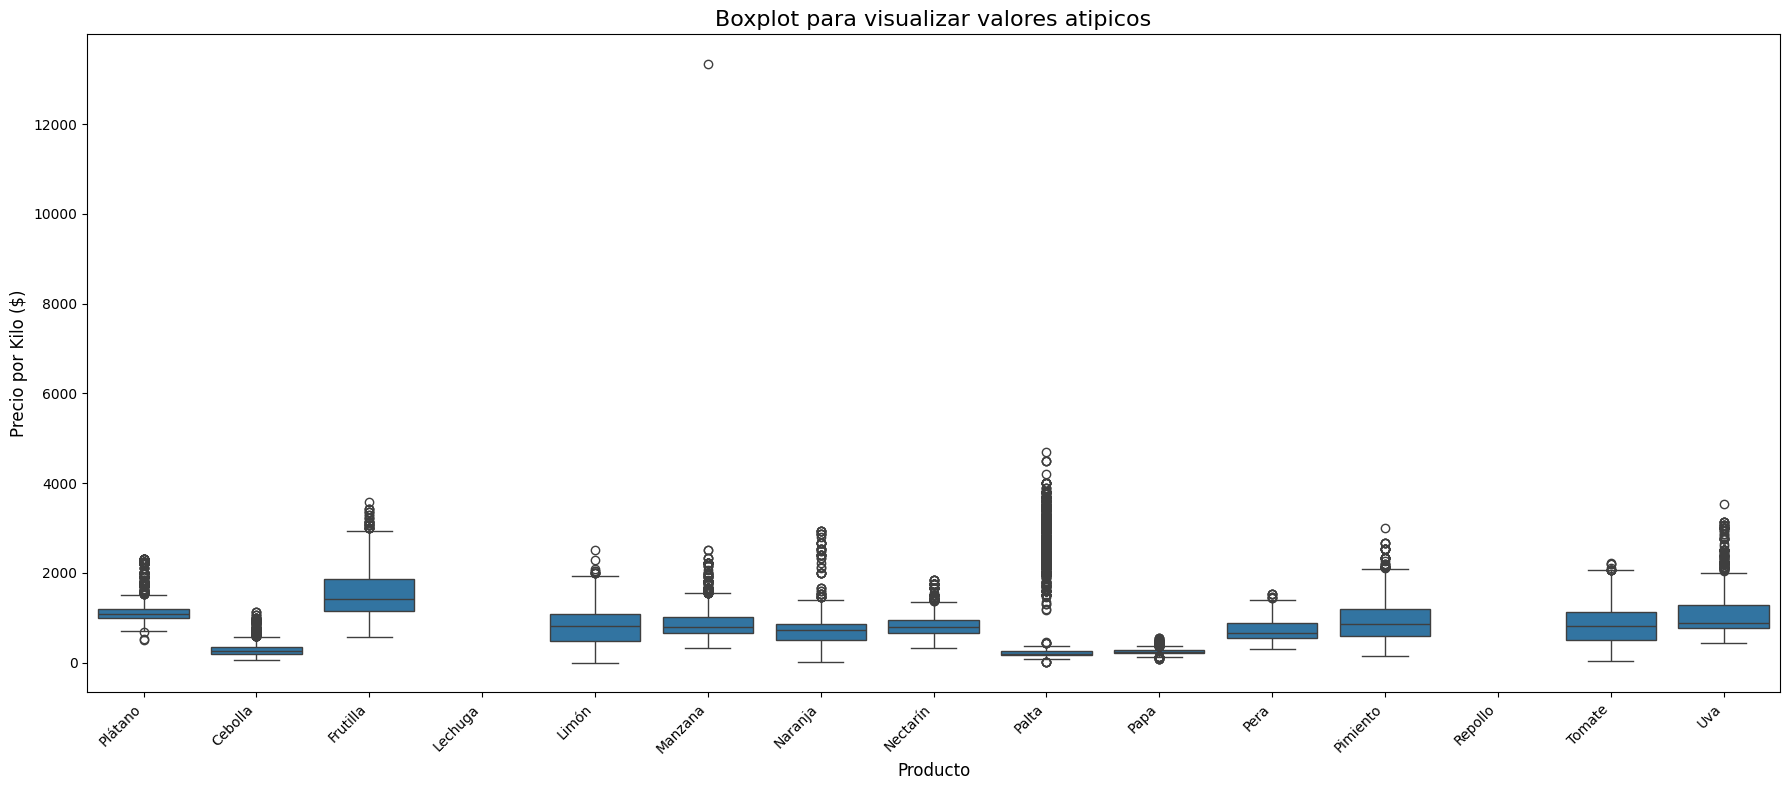

In [ ]:
# 1. Encontrar los 15 productos más comunes
top_15_productos = df1['producto'].value_counts().nlargest(15).index

# 2. Filtrar el DataFrame para incluir solo esos productos
df_top_productos = df1[df1['producto'].isin(top_15_productos)]

# 3. Crear el boxplot
plt.figure(figsize=(18, 8)) # Hacemos la figura más grande
sns.boxplot(data=df_top_productos, x='producto', y='precio_por_kg')
plt.title('Boxplot para visualizar valores atipicos', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio por Kilo ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el gráfico para que todo quepa bien
plt.show()

El boxplot ofrece una gran cantidad de información valiosa. Aquí tienes un análisis detallado de lo que puedes concluir:

1. Comparación de Precios Medios (¿Qué es más caro?)

La línea horizontal dentro de cada caja representa el precio mediano (el valor central). Al compararlas, puedes clasificar los productos por su costo.

Análisis: Se ve claramente que productos como el Ajo y el Pimentón tienen un precio medio consistentemente más alto. En contraste, productos como la Papa, el Zapallo y la Cebolla son, en promedio, mucho más económicos.

Para FRESCORP: Esto ayuda a definir una estrategia de "productos básicos" (baratos y de alto volumen) y "productos premium" (más caros y con mayor margen).

2. Volatilidad de Precios (¿Qué precios son más estables?)

La altura de la caja (el rango intercuartílico) te indica la variabilidad del precio para el 50% central de los datos.

Análisis: El Limón y el Tomate tienen cajas muy altas, lo que significa que sus precios son muy volátiles y cambian constantemente. Por otro lado, la Cebolla y la Papa tienen cajas muy cortas, lo que sugiere precios notablemente más estables y predecibles.

Para FRESCORP: Los productos con precios estables son de bajo riesgo. Los productos volátiles requieren una gestión de precios más activa y pueden ser buenos candidatos para promociones cuando el precio de compra es bajo.

3. Identificación de Precios Atípicos (Outliers)

Los puntos individuales que aparecen fuera de las "antenas" de las cajas son precios atípicos.

Análisis: Casi todos los productos tienen outliers, pero son especialmente notorios en el Ajo, Pimentón y Limón. Estos puntos representan transacciones donde el precio fue inusualmente alto en comparación con el rango típico para ese producto.

Para FRESCORP: Estos outliers podrían ser errores de datos que vale la pena revisar, o podrían indicar eventos reales como el fin de una temporada, una calidad "extra premium" o ventas en un mercado particularmente caro.

En resumen, este único gráfico te da una visión estratégica completa sobre el costo, la estabilidad y los riesgos asociados a cada uno de los productos más importantes, lo cual es fundamental para el plan de negocio de FRESCORP.

## Podemos ver un valor atípico extremo con el producto de manzana que distorciona enormemente el gráfico, lo ubicaremos y eliminaremos ya que seguramente es un error de ingreso de datos

In [ ]:
# Encontrar el valor máximo (el outlier extremo) para la manzana
valor_extremo = df1[df1['producto'] == 'Manzana']['precio_por_kg'].max()

print(valor_extremo)

13333.333333333334


In [110]:
# Obtener el índice de esa fila específica
indice_a_eliminar = df1[(df1['producto'] == 'Manzana') & (df1['precio_por_kg'] == valor_extremo)].index

# Eliminar la fila del DataFrame
df1.drop(index=indice_a_eliminar, inplace=True)

print(f"Se ha eliminado la fila con el precio extremo de: ${valor_extremo:,.2f}")

Se ha eliminado la fila con el precio extremo de: $13,333.33


C:\Users\fabri\AppData\Local\Temp\ipykernel_17280\3009909046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=indice_a_eliminar, inplace=True)


#### Pedimos de nuevo la visualizacion del gráfico anterior para confirmar los cambios

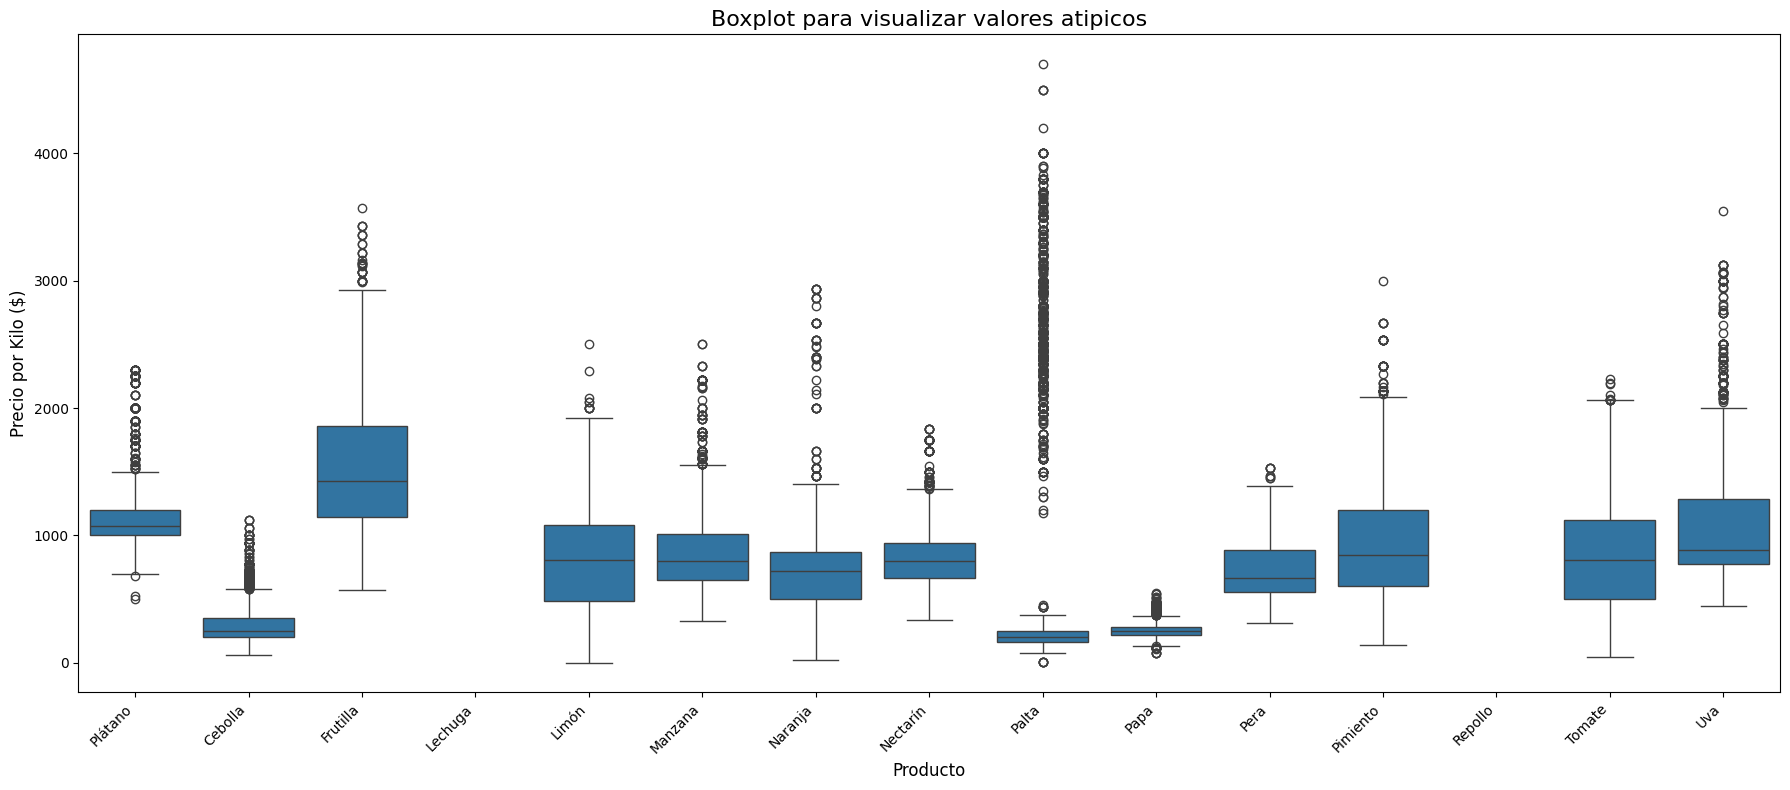

In [115]:
# Boxplot para visualizar los valores atípicos después de la eliminación
plt.figure(figsize=(18, 8)) # Hacemos la figura más grande
sns.boxplot(data=df_top_productos, x='producto', y='precio_por_kg')
plt.title('Boxplot para visualizar valores atipicos', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Precio por Kilo ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el gráfico para que todo quepa bien
plt.show()